In [157]:
import pandas as pd
import numpy as np
np.random.seed(2025)
train=pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.csv")
gen_sub=pd.read_csv('data/gender_submission.csv')
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

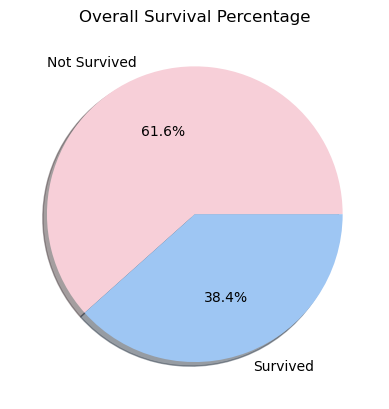

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
train['Survived'].value_counts().plot.pie(autopct="%1.1f%%", labels=["Not Survived", "Survived"], colors=['#F7CFD8', '#9EC6F3'],shadow=True)
plt.title("Overall Survival Percentage")
plt.ylabel("")  
plt.show()


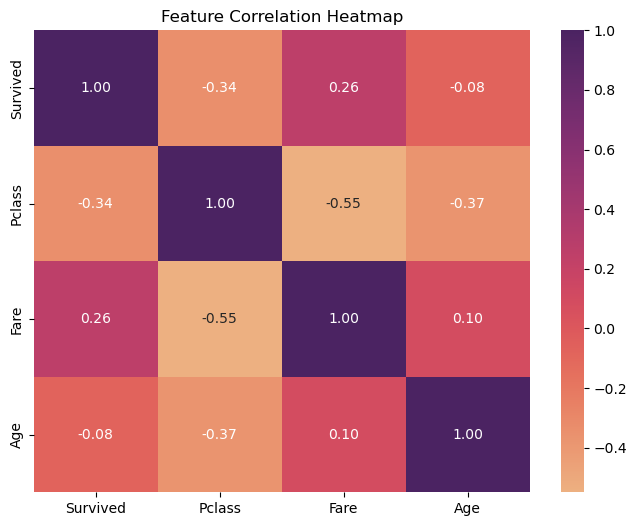

In [159]:
plt.figure(figsize=(8,6))
sns.heatmap(train[["Survived", "Pclass", "Fare","Age"]].corr(), annot=True, cmap="flare", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

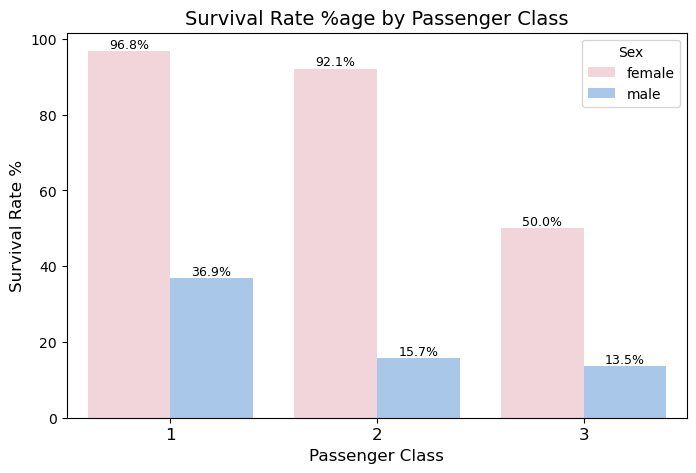

In [160]:
plt.figure(figsize=(8, 5))
ax=sns.barplot(x=train["Pclass"], y=train["Survived"]*100,hue=train['Sex'],errorbar=None, palette=['#F7CFD8', '#9EC6F3'])
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", fontsize=9)
plt.xlabel("Passenger Class",fontsize=12)
plt.ylabel("Survival Rate %",fontsize=12)
plt.title("Survival Rate %age by Passenger Class",fontsize=14)
plt.xticks(fontsize=12)
plt.show()

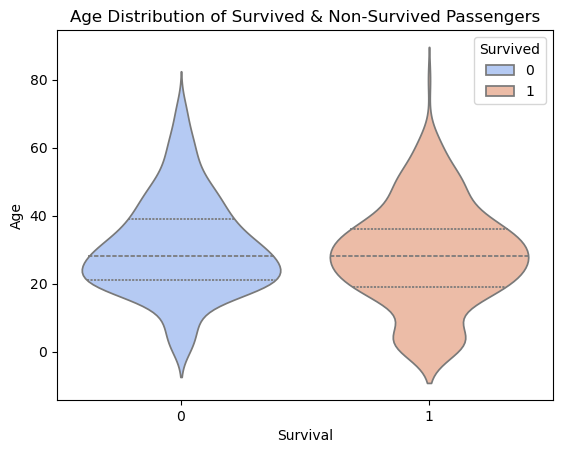

In [161]:
sns.violinplot(x="Survived", y="Age", data=train, palette="coolwarm", inner="quartile", hue="Survived")
plt.title("Age Distribution of Survived & Non-Survived Passengers")
plt.xlabel('Survival')
plt.show()

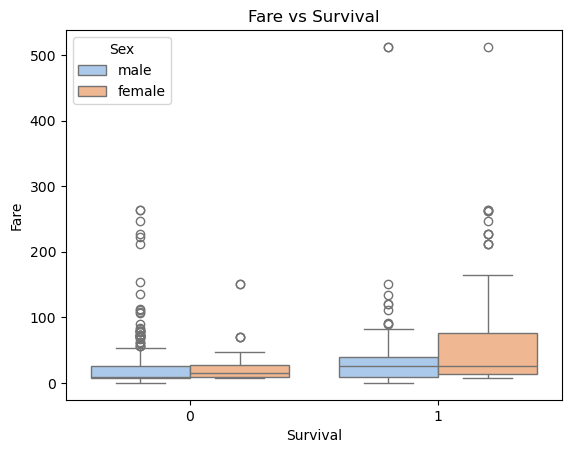

In [162]:
sns.boxplot(x="Survived", y="Fare", data=train, palette="pastel", hue="Sex")
plt.title("Fare vs Survival")
plt.xlabel('Survival')
plt.show()

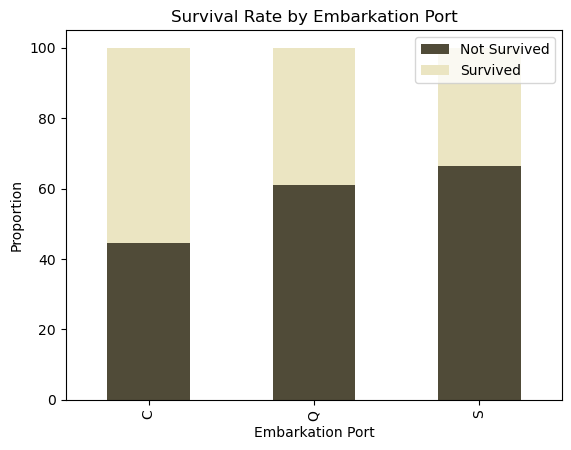

In [163]:
embarked_survival = train.groupby("Embarked")["Survived"].value_counts(normalize=True).unstack()*100
embarked_survival.plot(kind="bar", stacked=True, color=["#504B38", "#EBE5C2"])
plt.xlabel("Embarkation Port")
plt.ylabel("Proportion")
plt.title("Survival Rate by Embarkation Port")
plt.legend(["Not Survived", "Survived"])
plt.show()

In [164]:
Y_train=train['Survived']
train.drop(columns='Survived',axis=1,inplace=True)
merged = result = pd.concat([train, test], ignore_index=True)
print(merged)
print('\n','\n', Y_train, '\n','\n')
print(gen_sub)

      PassengerId  Pclass                                               Name  \
0               1       3                            Braund, Mr. Owen Harris   
1               2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2               3       3                             Heikkinen, Miss. Laina   
3               4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4               5       3                           Allen, Mr. William Henry   
...           ...     ...                                                ...   
1304         1305       3                                 Spector, Mr. Woolf   
1305         1306       1                       Oliva y Ocana, Dona. Fermina   
1306         1307       3                       Saether, Mr. Simon Sivertsen   
1307         1308       3                                Ware, Mr. Frederick   
1308         1309       3                           Peter, Master. Michael J   

         Sex   Age  SibSp  Parch       

In [165]:
print(merged.info(), '\n','\n')        
print(merged.describe(), '\n','\n')  
print(merged.isnull().sum(), '\n','\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB
None 
 

       PassengerId       Pclass          Age        SibSp        Parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean    655.000000     2.294882    29.881138     0.498854     0.385027   
std     378.020061     0.837836    14.413493     1.0

In [166]:
merged.drop(columns=['Cabin', 'PassengerId'],axis=1,inplace=True)
median_age = merged['Age'].median(skipna=True)
merged['Age'] = merged['Age'].fillna(median_age)
median_fare = merged['Fare'].median()
merged['Fare'] = merged['Fare'].fillna(median_fare)
mode_embarked = merged['Embarked'].mode()[0]
merged['Embarked'] = merged['Embarked'].fillna(mode_embarked)
print(merged.isnull().sum(), '\n','\n')

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64 
 



In [167]:
embarked_encoded = pd.get_dummies(merged['Embarked'], prefix='Embarked').astype(int)
merged = pd.concat([merged, embarked_encoded], axis=1)
merged.drop('Embarked', axis=1, inplace=True)
merged.head(5)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,0,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0,1


In [168]:
def group_size_category(size):
    if size == 1:
        return 'Solo'
    elif size <= 3:
        return 'Small'
    elif size <= 6:
        return 'Medium'
    else:
        return 'Large'


merged['Ticket'].value_counts()
merged['TicketGroupSize'] = merged.groupby('Ticket')['Ticket'].transform('count')
merged['TicketGroupCategory'] = merged['TicketGroupSize'].apply(group_size_category)
ticket_dummies = pd.get_dummies(merged['TicketGroupCategory'], prefix='TicketGroup').astype(int)
merged = pd.concat([merged, ticket_dummies], axis=1)
merged.drop(columns=['Ticket','TicketGroupSize','TicketGroupCategory'], inplace=True)

merged.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,TicketGroup_Large,TicketGroup_Medium,TicketGroup_Small,TicketGroup_Solo
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,0,1,0,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,0,0,0,0,1,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,0,1,0,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0,0,1,0,0,1,0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,0,1,0,0,0,1


In [169]:
sex_dummies = pd.get_dummies(merged['Sex'], prefix='Sex', drop_first=True).astype(int)
merged = pd.concat([merged, sex_dummies], axis=1)
merged.drop(columns='Sex', inplace=True)
merged.head(5)

,Pclass,Name,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,TicketGroup_Large,TicketGroup_Medium,TicketGroup_Small,TicketGroup_Solo,Sex_male
0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,0,1,0,0,0,1,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,0,0,0,1,0,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,1,0,0,0,1,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,1,0,0,1,0,0
4,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,0,1,0,0,0,1,1


In [170]:
merged['Title'] = merged['Name'].str.extract(r',\s*([^\.]+)\.')
merged['Title'] = merged['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Noble',
    'Countess': 'Noble',
    'Dona': 'Noble',
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Major': 'Rare',
    'Capt': 'Rare',
    'Sir': 'Noble',
    'Jonkheer': 'Noble',
    'Don': 'Noble'
})
title_dummies = pd.get_dummies(merged['Title'], prefix='Title', drop_first=True)
merged = pd.concat([merged, title_dummies], axis=1)
merged.drop(columns=['Name','Title'], inplace=True)
merged.head(5)

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,TicketGroup_Large,TicketGroup_Medium,TicketGroup_Small,TicketGroup_Solo,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Rare,Title_the Countess
0,3,22.0,1,0,7.2500,0,0,1,0,0,0,1,1,False,True,False,False,False,False
1,1,38.0,1,0,71.2833,1,0,0,0,0,1,0,0,False,False,True,False,False,False
2,3,26.0,0,0,7.9250,0,0,1,0,0,0,1,0,True,False,False,False,False,False
3,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,False,False,True,False,False,False
4,3,35.0,0,0,8.0500,0,0,1,0,0,0,1,1,False,True,False,False,False,False


In [171]:
train_2 = merged[:891]
test_2 = merged[891:].reset_index(drop=True)
print(f"X_train shape is = {train_2.shape}" )
print(f"Y_train shape is = {Y_train.shape}" )



X_train shape is = (891, 19)
Y_train shape is = (891,)


               Feature  Importance
14            Title_Mr    0.318018
4                 Fare    0.289570
1                  Age    0.171232
0               Pclass    0.088663
2                SibSp    0.034257
17          Title_Rare    0.029483
3                Parch    0.016871
7           Embarked_S    0.014627
10   TicketGroup_Small    0.008777
6           Embarked_Q    0.006196
13          Title_Miss    0.006170
5           Embarked_C    0.004994
16         Title_Noble    0.004875
11    TicketGroup_Solo    0.003696
12            Sex_male    0.002057
15           Title_Mrs    0.000514
9   TicketGroup_Medium    0.000000
8    TicketGroup_Large    0.000000
18  Title_the Countess    0.000000


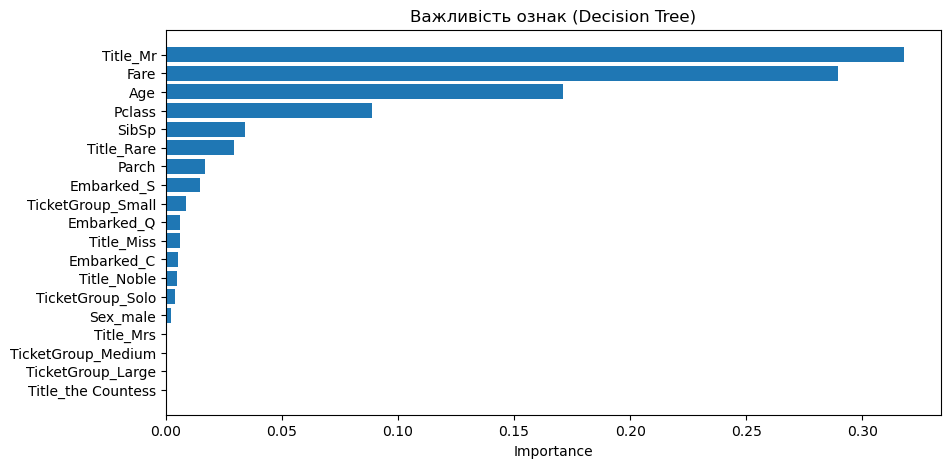

In [172]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_2, Y_train, test_size=0.2)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': train_2.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Важливість ознак (Decision Tree)')
plt.xlabel('Importance')
plt.show()


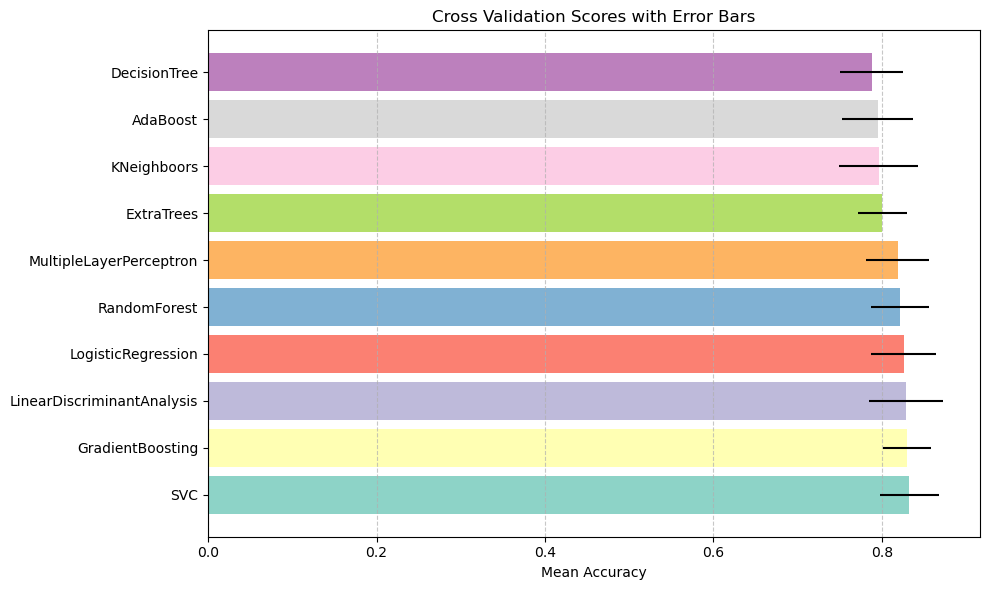

   CrossValMeans  CrossValerrors                   Algorithm
0       0.832883        0.035216                         SVC
5       0.830047        0.028504            GradientBoosting
9       0.828678        0.044320  LinearDiscriminantAnalysis
8       0.825861        0.038819          LogisticRegression
3       0.821655        0.034368                RandomForest
6       0.818799        0.037054     MultipleLayerPerceptron
4       0.800626        0.028816                  ExtraTrees
7       0.796303        0.046563                 KNeighboors
2       0.795012        0.041876                    AdaBoost
1       0.788028        0.037291                DecisionTree


In [173]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=10)
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_scaled, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

cv_res_sorted = cv_res.sort_values(by="CrossValMeans", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(
    cv_res_sorted["Algorithm"],
    cv_res_sorted["CrossValMeans"],
    xerr=cv_res_sorted["CrossValerrors"],
    color=plt.cm.Set3.colors
)
plt.xlabel("Mean Accuracy")
plt.title("Cross Validation Scores with Error Bars")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print(cv_res_sorted)

In [174]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'sigmoid','rbf']
}
svc = SVC()
grid = GridSearchCV(svc, param_grid, refit=True, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)
print("Best parameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)
best_model = grid.best_estimator_

Best parameters: {'C': 0.01, 'gamma': 1, 'kernel': 'poly'}
Best accuracy: 0.8342755835713582
